### 개요
- 이벤트는 동영상당 1개다

- 분류해야 하는 최종 문제는 액션 분류가 아니라 이벤트 12개 분류이다
 
- 액션은 배우(obejct) 1명에게 귀속된다.
 
- 액션에는 person_name 이랑 action_name 이 있다. 
 
- 클립은 액션 기준으로 짜른 거다. 즉 동일 프레임에 여러 사람이 나오면 그 프레임은 여러 (짤린)클립에 다 들어간다.

------
### 라벨 (action_clip_res.csv)

In [1]:
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

plt.style.use(['dark_background', 'bmh'])

from pathlib import Path
import pandas as pd
from addict import Dict
import seaborn as sns

BASE = './data/abnormal'
read_csv = lambda s: pd.read_csv(Path(BASE)/(s+'.csv'))

# 모든 csv 다 읽기
df = Dict({s:read_csv(s) for s in ['action', 'event', 'action_clip', 'event_action', 'action_clip_res']})

# actin_clip_res.csv 중에 res == 'ok' 인 row만 필터링
df_label = df.action_clip_res.query('res=="ok"')
print('len(df_label):', len(df_label))
df_label.head(3)

len(df_label): 88870


,Unnamed: 0,folder,filename,path,width,height,depth,fps,frames,duration,...,position_x,position_y,actionname,start,end,clip_start,clip_end,clip_duration_sec,clip_name,res
0,85659,swoon,99-4_cam03_swoon01_place03_day_winter.mp4,05_Swoon/insidedoor_07/99-4_swoon01_place03_da...,3840,2160,3,30,9199,00:05:06.6,...,1428,902,falldown,5145,5442,5085,5503,13.933333,99-4_swoon01_place03_day.99-4_cam03_swoon01_pl...,ok
1,85658,swoon,99-4_cam03_swoon01_place03_day_winter.mp4,05_Swoon/insidedoor_07/99-4_swoon01_place03_da...,3840,2160,3,30,9199,00:05:06.6,...,1428,902,falldown,5052,5145,4992,5206,7.133333,99-4_swoon01_place03_day.99-4_cam03_swoon01_pl...,ok
2,85648,swoon,99-4_cam03_swoon01_place03_day_summer.mp4,05_Swoon/insidedoor_07/99-4_swoon01_place03_da...,3840,2160,3,30,9608,00:05:20.3,...,1365,828,falldown,5818,6105,5758,6166,13.600000,99-4_swoon01_place03_day.99-4_cam03_swoon01_pl...,ok


## 실제로 존재하는 클립만 추림

In [2]:
def get_clip_list(): 
    sub_dir = lambda f: [f for f in Path(f).iterdir() if f.is_dir()]
    sub_avi = lambda f: [f for f in Path(f).iterdir() if f.suffix == '.avi']
    events = sub_dir('/data1/gc2020/abnormal/action_clip')
    events = sum([sub_dir(e) for e in events], [])
    avis = sum([sub_avi(e) for e in events], [])
    avis = {Path(a).name:a for a in avis}
    return avis
clip_list = get_clip_list()
df_file = pd.DataFrame({'clip_name':list(clip_list.keys())})
df_label = pd.merge(df_label, df_file, on='clip_name', how='inner')
print('len(df_label):', len(df_label))
df_label.head(3)

len(df_label): 88841


,Unnamed: 0,folder,filename,path,width,height,depth,fps,frames,duration,...,position_x,position_y,actionname,start,end,clip_start,clip_end,clip_duration_sec,clip_name,res
0,85659,swoon,99-4_cam03_swoon01_place03_day_winter.mp4,05_Swoon/insidedoor_07/99-4_swoon01_place03_da...,3840,2160,3,30,9199,00:05:06.6,...,1428,902,falldown,5145,5442,5085,5503,13.933333,99-4_swoon01_place03_day.99-4_cam03_swoon01_pl...,ok
1,85658,swoon,99-4_cam03_swoon01_place03_day_winter.mp4,05_Swoon/insidedoor_07/99-4_swoon01_place03_da...,3840,2160,3,30,9199,00:05:06.6,...,1428,902,falldown,5052,5145,4992,5206,7.133333,99-4_swoon01_place03_day.99-4_cam03_swoon01_pl...,ok
2,85648,swoon,99-4_cam03_swoon01_place03_day_summer.mp4,05_Swoon/insidedoor_07/99-4_swoon01_place03_da...,3840,2160,3,30,9608,00:05:20.3,...,1365,828,falldown,5818,6105,5758,6166,13.600000,99-4_swoon01_place03_day.99-4_cam03_swoon01_pl...,ok


------
### 액션 통계

,action_name count
totter,12498
pulling,11061
punching,9949
stop and go,9393
kicking,8625
pushing,8039
falldown,7730
sitdown,7030
threaten,6612
carring,2202


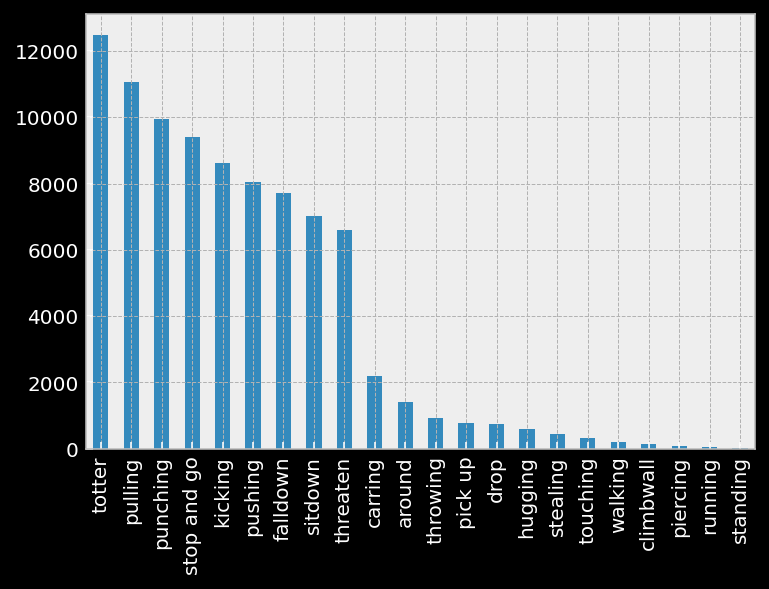

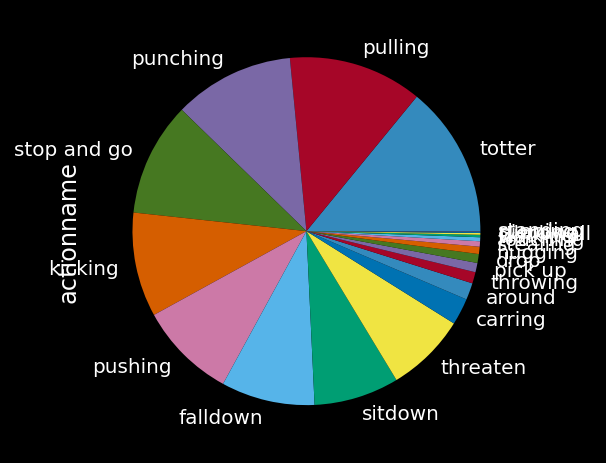

In [3]:
vc = df_label.actionname.value_counts()
display(pd.DataFrame(vc).rename(columns={'actionname': 'action_name count'}))
vc.plot.bar();plt.show()
vc.plot.pie(); plt.show()

------
### 이벤트 통계

,event_name count
fight,20193
drunken,18226
assault,16850
wander,10790
datefight,5569
swoon,4578
robbery,3499
burglary,2760
vandalism,2731
kidnap,1615


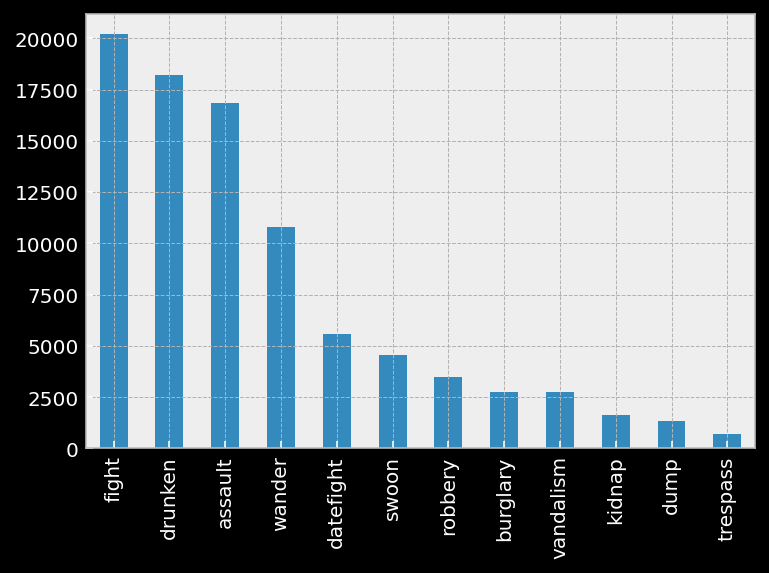

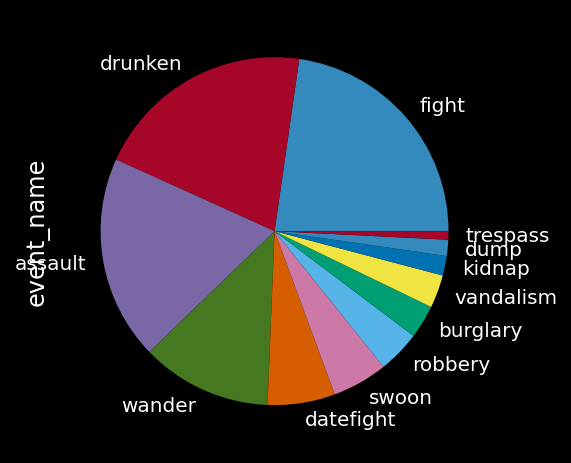

In [4]:
vc = df_label.event_name.value_counts()
display(pd.DataFrame(vc).rename(columns={'event_name':'event_name count'}))
vc.plot.bar();plt.show()
vc.plot.pie();plt.show()

------
### 액션 샘플

In [37]:
#[f'{k} ({for k in df_label.actionname.value_counts().]
vc = df_label.actionname.value_counts()
labels = [f'  {k:13s}({v:5d} 개)'for k, v in zip(vc.index.tolist(), vc.tolist())]

import ipywidgets as widgets
from IPython.display import Video
import random

lst = widgets.Select(
    options = labels,
    layout = widgets.Layout(height='450px', width='150px')
)
btn  = widgets.Button(description='random')

In [46]:
from tqdm.auto import tqdm
from PIL import Image
from ipywidgets import Output
import cv2
from IPython.display import clear_output

path = '/data1/gc2020/abnormal/action_clip/03_Burglary/outsidedoor_03/58-6.58-6_cam01_burglary01_place02_day_spring.mp4.7748.avi' 

def show_video(path):
    cap = cv2.VideoCapture(path)
    assert cap.isOpened()
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    sub_out = Output()
    display(sub_out)
    for i in tqdm(range(length)):
        r, f = cap.read()
        if not r:
            break
        if i%5 == 0: 
            with sub_out:
                img = Image.fromarray(f[:,:,[2,1,0]])
                w, h = img.size
                img = img.resize((w//4, h//4), Image.BICUBIC)
                display(img)
                clear_output(wait=True)

In [47]:
out = widgets.Output()
@out.capture()
def on_click(b):
    with out:
        action_name = lst.value.split('(')[0].strip()
        row = df_label.query('actionname == @action_name').sample(n=1).iloc[0]
        path = '/data1/gc2020/abnormal/action_clip/' + '/'.join(row['path'].split('/')[:2]) + '/' + row['clip_name']
        print(path)
        assert Path(path).exists() == True
        show_video(path)
        out.clear_output(wait=True)

In [48]:
lst.observe(on_click, names='value')
btn.on_click(on_click)

In [ ]:
widgets.HBox([lst, widgets.VBox([out, btn])])